<a href="https://colab.research.google.com/github/cerenyildizdag/IE423/blob/IE423/yildizdagcerenfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dfOS = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_shoppers_intention.csv')

In [5]:
dfOS.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


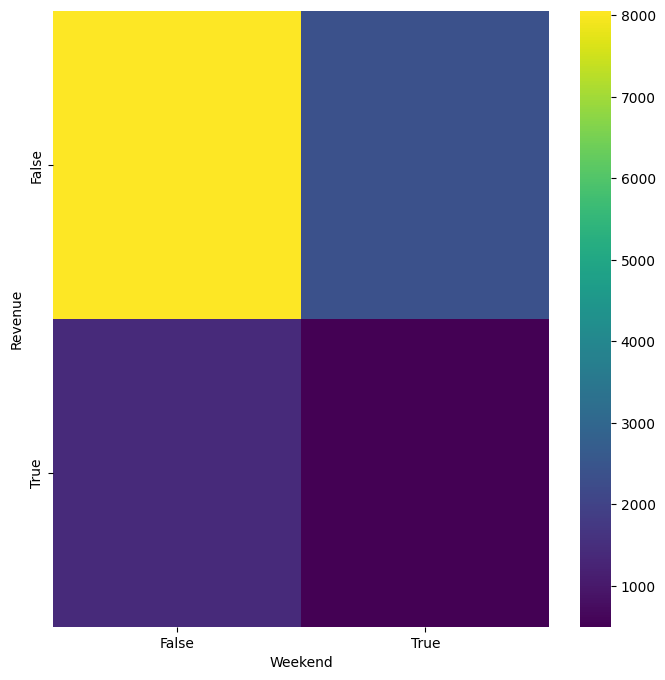

In [6]:
# @title Weekend vs Revenue

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Revenue'].value_counts()
    for x_label, grp in dfOS.groupby('Weekend')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Weekend')
_ = plt.ylabel('Revenue')

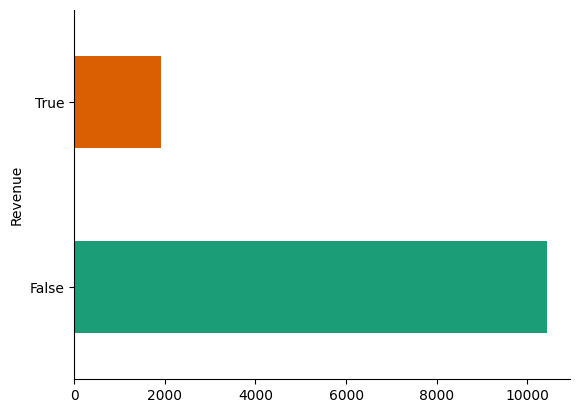

In [7]:
# @title Revenue

from matplotlib import pyplot as plt
import seaborn as sns
dfOS.groupby('Revenue').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

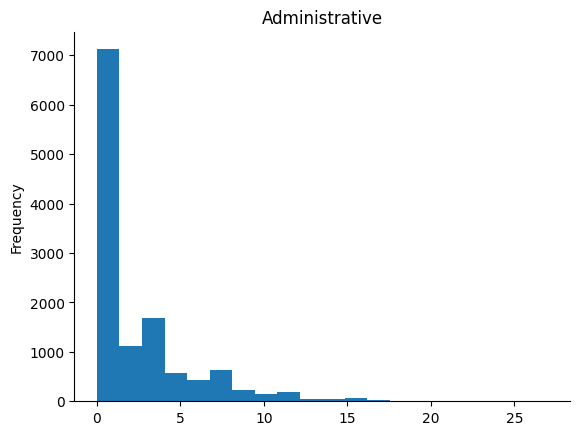

In [8]:
# @title Administrative

from matplotlib import pyplot as plt
dfOS['Administrative'].plot(kind='hist', bins=20, title='Administrative')
plt.gca().spines[['top', 'right',]].set_visible(False)

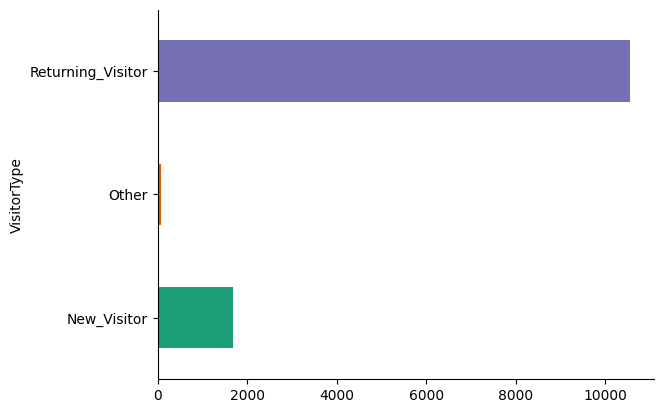

In [9]:
# @title VisitorType

from matplotlib import pyplot as plt
import seaborn as sns
dfOS.groupby('VisitorType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

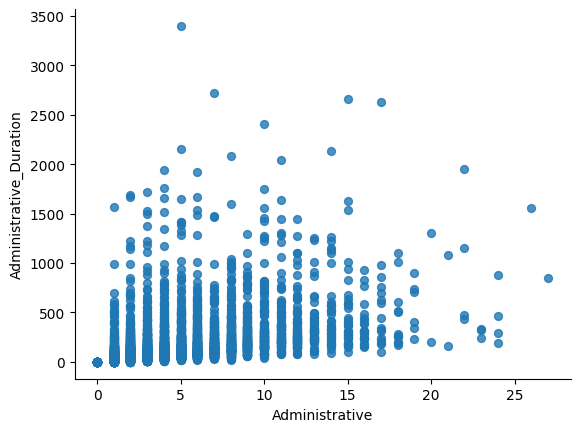

In [10]:
# @title Administrative vs Administrative_Duration

from matplotlib import pyplot as plt
dfOS.plot(kind='scatter', x='Administrative', y='Administrative_Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

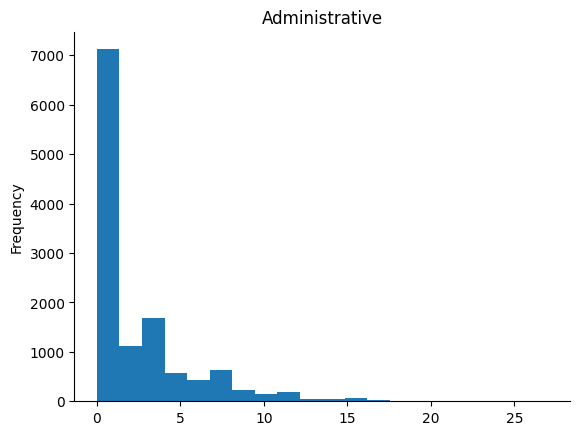

In [11]:
# @title Administrative

from matplotlib import pyplot as plt
dfOS['Administrative'].plot(kind='hist', bins=20, title='Administrative')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Exploratory Data Analysis**

In [12]:
dfOS.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


Now, visualize distributions of variables

In [13]:
dfOS['Revenue'].value_counts()

,count
Revenue,
False,10422
True,1908


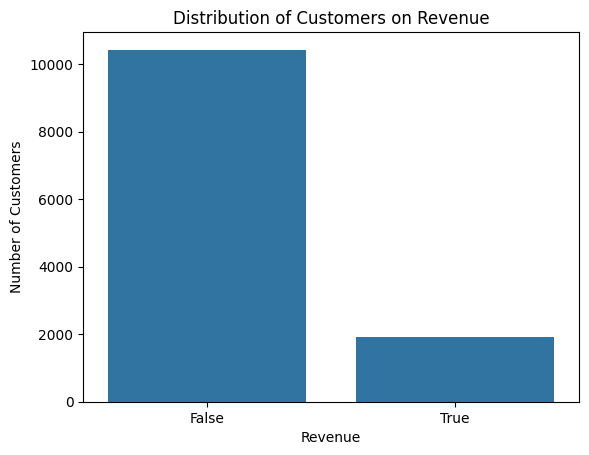

In [15]:
# Group the data by 'Revenue' and count the occurrences
revenue_distribution = dfOS.groupby('Revenue').size()

# Plot the distribution as a bar plot
sns.countplot(x='Revenue', data=dfOS)
plt.xlabel('Revenue')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers on Revenue')
plt.show()

This shows that the vast majority of entries of customers choose not to purchase.

**2. Data Preprocessing**

In [16]:
dfOS.isnull().sum()


,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


There is no null values in our dataset.

Standardization:

This scales features to have a mean of 0 and a standard deviation of 1.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
dfOS[numerical_features] = scaler.fit_transform(dfOS[numerical_features])

In [18]:
#One-hot encoding
df1 = pd.get_dummies(dfOS)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,True
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,True
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,True
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,True
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,False,True


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  float64
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  float64
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  float64
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

In [20]:
# Label Encoding of revenue
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Revenue'] = le.fit_transform(df1['Revenue'])
df1['Revenue'].value_counts()

,count
Revenue,
0,10422
1,1908


In [21]:
df1['Weekend'].value_counts()

,count
Weekend,
False,9462
True,2868


In [22]:
# Label encoding of weekend

df1['Weekend'] = le.fit_transform(df1['Weekend'])
df1['Weekend'].value_counts()

,count
Weekend,
0,9462
1,2868


In [23]:
# Splitting dependent and independent variables(columns)
y = df1['Revenue']
x = df1.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (12330, 28)
Shape of y:  (12330,)


In [24]:
# Splitting of the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 28)
Shape of y_train : (9864,)
Shape of x_test : (2466, 28)
Shape of y_test : (2466,)


In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

**Gaussian Naive Bayes Classifier**

In [26]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Make prediction using our test data and model
y_pred = gnb.predict(x_test)

# Comparing our prediction to response values
print("Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test, y_pred)*100,2))

Gaussian Naive Bayes model accuracy(in %): 68.82


**Random Forest Classifier**

In [27]:
# Fit Random Forest Classifier to our Training Data
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(x_test)
y_prob_rfc = rfc.predict_proba(x_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 87.75


**Extra Trees Classifier**

In [28]:
# Fit Extra Trees Classifier to our Training Data
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(x_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(x_test)
y_prob_etc = etc.predict_proba(x_test)[:, 1]

# Comparing our prediction to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 88.2


**ROC-AUC**

The area under the ROC curve is: 0.92


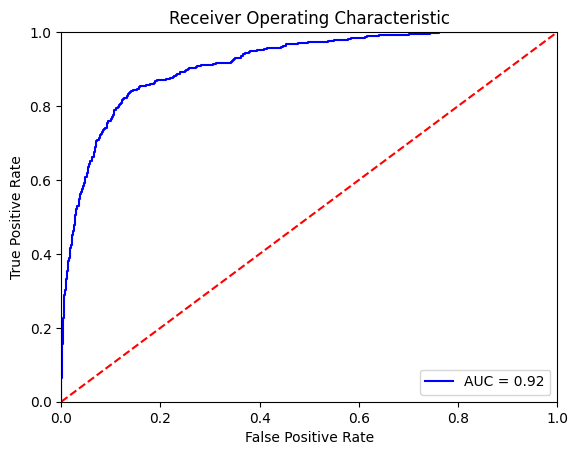

In [29]:
# Calculate ROC AUC for the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Log Loss**

In [30]:
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.17


Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.


**Stratifying Training Data**


We need to stratify our training data in order to get an equal ratio of training labels because the training data is significantly skewed towards the 'No purchase made' category.

In [31]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(x, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [32]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb_stratified = GaussianNB()
gnb_stratified.fit(X_train_stratified, y_train_stratified)

# Make prediction using our test data and model
y_pred_stratified = gnb_stratified.predict(X_test_stratified)

# Comparing our prediction to response values
print("Stratified Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test_stratified, y_pred_stratified)*100,2))

Stratified Gaussian Naive Bayes model accuracy(in %): 69.38


In [33]:
# Fit Random Forest Classifier to our Training Data
rfc_stratified = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_rfc_stratified = rfc_stratified.predict(X_test_stratified)
y_prob_rfc_stratified = rfc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediction to response values
print('Stratified Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_rfc_stratified)*100,2))

Stratified Random Forest Classifier model accuracy(in %): 88.48


In [34]:
# Plot the ROC curve for the Random Forest Classifier for both the stratified data versus the unbalanced data.

roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve for unbalanced data is:', round(roc_value,2))

roc_value_stratified = roc_auc_score(y_test_stratified, y_prob_rfc_stratified)
print('The area under the ROC curve for stratified data is:', round(roc_value_stratified,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

fpr_strat, tpr_strat, threshold_strat = metrics.roc_curve(y_test_stratified, y_prob_rfc_stratified)
roc_auc_strat = metrics.auc(fpr_strat, tpr_strat)

The area under the ROC curve for unbalanced data is: 0.92
The area under the ROC curve for stratified data is: 0.92


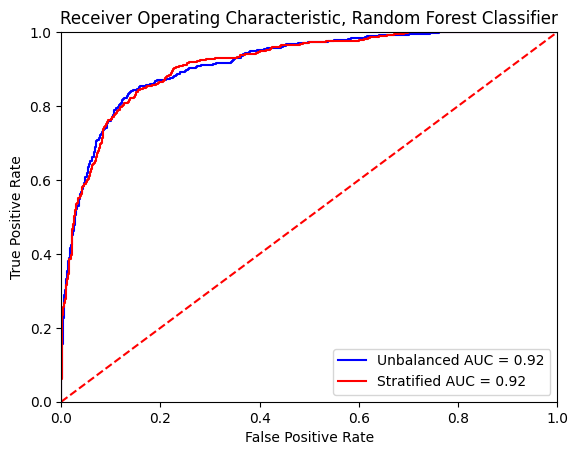

In [35]:
# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'Unbalanced AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Feature Engineering**



Let's monitor the feature importance of each of our features to see which features are important for the prediction's outcome and see if we can refine our model in this way.

In [36]:
importances = rfc_stratified.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_stratified.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train_stratified.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 8 (0.612790)
2. Feature 7 (0.082723)
3. Feature 5 (0.063401)
4. Feature 6 (0.040726)
5. Feature 4 (0.039422)
6. Feature 22 (0.036325)
7. Feature 0 (0.026112)
8. Feature 1 (0.022851)
9. Feature 27 (0.015408)
10. Feature 25 (0.014255)
11. Feature 3 (0.008560)
12. Feature 2 (0.006148)
13. Feature 21 (0.005130)
14. Feature 13 (0.004637)
15. Feature 20 (0.002910)
16. Feature 10 (0.002730)
17. Feature 12 (0.002587)
18. Feature 11 (0.002500)
19. Feature 9 (0.002415)
20. Feature 23 (0.001988)
21. Feature 24 (0.001881)
22. Feature 16 (0.001348)
23. Feature 14 (0.000936)
24. Feature 18 (0.000810)
25. Feature 15 (0.000632)
26. Feature 19 (0.000359)
27. Feature 26 (0.000254)
28. Feature 17 (0.000163)


In [37]:
#Generating a dataframe for our feature importance

col_names = pd.Series([col for col in X_train_stratified.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted

,Importance
PageValues,0.612790
ExitRates,0.082723
ProductRelated_Duration,0.063401
BounceRates,0.040726
ProductRelated,0.039422
Month_Nov,0.036325
Administrative,0.026112
Administrative_Duration,0.022851
VisitorType_Returning_Visitor,0.015408
VisitorType_New_Visitor,0.014255


It is seen that the "Page Values" function appears to have the most importance to impact.

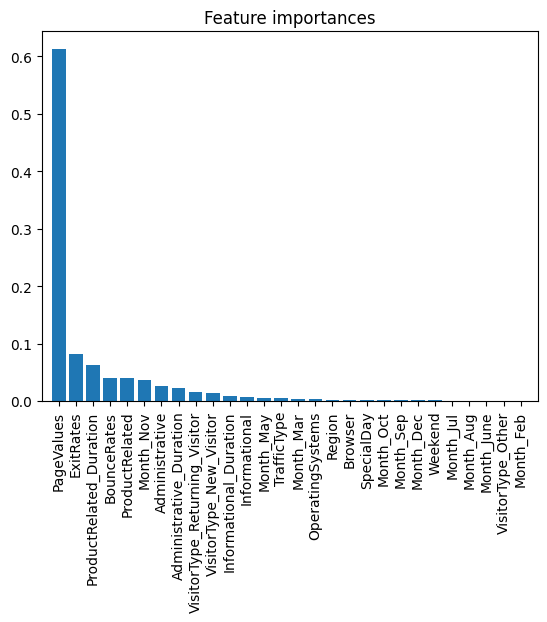

In [38]:
plt.title("Feature importances")
plt.bar(range(X_train_stratified.shape[1]),importances[indices])
plt.xticks(range(X_train_stratified.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train_stratified.shape[1]])
plt.show()

We try to improve our model by using only those factors that could significantly impact our classification. The top five most significant characteristics will be selected using our feature importance chart: PageValues, BounceRates, ProductRelated, ExitRates, and ProductRelated Duration. Additionally, we want to use cross validation to determine the efficiency of our simplifified model after it has been created.

**Model Building**

In [39]:
# Creating simple model dataset
# Removing unneccessary columns from data
shopping_clean = dfOS.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)
visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)
shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)


simple_model = shopping_clean_merged.drop(['Administrative_Duration','Administrative','Visitor_Type_Returning_Visitor','Informational_Duration','Informational','SpecialDay','Visitor_Type_Other'], axis=1)

In [40]:
# Split train and test data

X_simp = simple_model.drop('Revenue', axis=1)
y_simp = simple_model['Revenue']
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=2)

In [41]:
clf = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)

scores = cross_val_score(clf, X_simp, y_simp, cv=cv)
print("Average Accuracy of Classifier over 10-folds: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average Accuracy of Classifier over 10-folds: 0.90 (+/- 0.01)


Now compare our simplified model with our previous models.

In [42]:
X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simp, y_simp,stratify=y_simp, test_size=.2, shuffle=True, random_state=1)
clf_simp = RandomForestClassifier(max_depth=5, n_estimators=1000)

clf_simp.fit(X_train_simp,y_train_simp)
y_pred_simp = clf_simp.predict(X_test_simp)
y_prob_simp = clf_simp.predict_proba(X_test_simp)[:, 1]

fpr_simp, tpr_simp, threshold_strat = metrics.roc_curve(y_test_simp, y_prob_simp)
roc_auc_simp = metrics.auc(fpr_simp, tpr_simp)

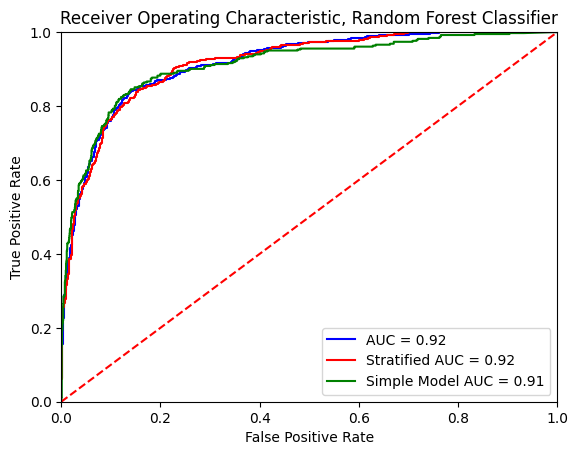

In [43]:
# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The performance of the three versions appears to be similar. In order to determine whether the classifiers are outperforming guesswork,now attempt a dummy classifier and compare the outcomes.

In [44]:
# Dummy Classifier

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train,y_train)

y_pred_dummy = dummy_clf.predict(x_test)
y_prob_dummy = dummy_clf.predict_proba(x_test)[:, 1]

fpr_dummy, tpr_dummy, threshold_strat = metrics.roc_curve(y_test, y_prob_dummy)
roc_auc_dummy = metrics.auc(fpr_dummy, tpr_dummy)

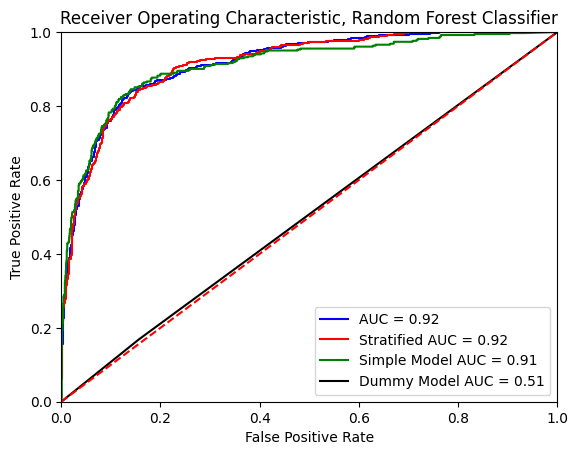

In [45]:
# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.plot(fpr_dummy, tpr_dummy, 'k', label = 'Dummy Model AUC = %0.2f' % roc_auc_dummy)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

*   Compared to speculating, our model appears to be much more precise. With a random forest classifier, we can reach an accuracy of about 90%.
*   Given that the dummy classifier is generating estimates based on the distribution of a stratified dataset, it is accurate roughly 50% of the time.
*   Our basic model would be the most effective one to use if we were to implement this concept. The basic model, which solely uses five features for classification, performs similarly to our other models.

**Conclusion**
1. **Limitations**:

*   **Imbalanced Dataset**: Our dataset is heavily skewed towards 'No purchase made'. I addressed this issue by applying stratification.
*   **Limited Feature Engineering**: I performed basic encoding and scaling, but more advanced feature engineering could potentially improve model performance.

2. **Potential Improvements**:

*   **Addressing Class Imbalance**: Applying techniques like SMOTE to oversample the minority class or using cost-sensitive learning to penalize misclassifications of the minority class more heavily.
*   **Advanced Feature Engineering**: Creating more new features based on domain knowledge or using automated feature engineering techniques.
*   **Ensemble Methods**: Experiment with combining predictions from multiple models (e.g., bagging, boosting) to potentially improve overall performance.
